In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [64]:
df=pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [65]:
df.shape

(6362620, 11)

In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [68]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,243.40,142.33,1.0,156.00,239.00,335.00,7.430000e+02
amount,6362620.0,179861.90,603858.23,0.0,13389.57,74871.94,208721.48,9.244552e+07
oldbalanceOrg,6362620.0,833883.10,2888242.67,0.0,0.00,14208.00,107315.18,5.958504e+07
newbalanceOrig,6362620.0,855113.67,2924048.50,0.0,0.00,0.00,144258.41,4.958504e+07
oldbalanceDest,6362620.0,1100701.67,3399180.11,0.0,0.00,132705.66,943036.71,3.560159e+08
newbalanceDest,6362620.0,1224996.40,3674128.94,0.0,0.00,214661.44,1111909.25,3.561793e+08


In [70]:
# checking the number of missing values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [71]:
df.dtypes[df.dtypes == 'object']

type        object
nameOrig    object
nameDest    object
dtype: object

In [72]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())
df['nameOrig'].value_counts()


 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [73]:
#label encoding
le = LabelEncoder()
categorial_col = ['type','nameOrig','nameDest']
for column in categorial_col:
    df[column] = le.fit_transform(df[column])

In [74]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [75]:
from sklearn.feature_selection import VarianceThreshold
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

In [76]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

'isFlaggedFraud' feature having Low_variation in data

In [77]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.006635  0.022373 -0.000146      -0.010058   
type            0.006635  1.000000  0.088419  0.000213      -0.339760   
amount          0.022373  0.088419  1.000000  0.000124      -0.002762   
nameOrig       -0.000146  0.000213  0.000124  1.000000      -0.000648   
oldbalanceOrg  -0.010058 -0.339760 -0.002762 -0.000648       1.000000   
newbalanceOrig -0.010299 -0.352758 -0.007861 -0.000675       0.998803   
nameDest        0.003767  0.584275 -0.169150 -0.000256      -0.162688   
oldbalanceDest  0.027665 -0.104679  0.294137  0.000245       0.066243   
newbalanceDest  0.025888 -0.059364  0.459304  0.000255       0.042029   
isFraud         0.031578  0.020833  0.076688 -0.000464       0.010154   
isFlaggedFraud  0.003277  0.002685  0.012295  0.000667       0.003835   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.010

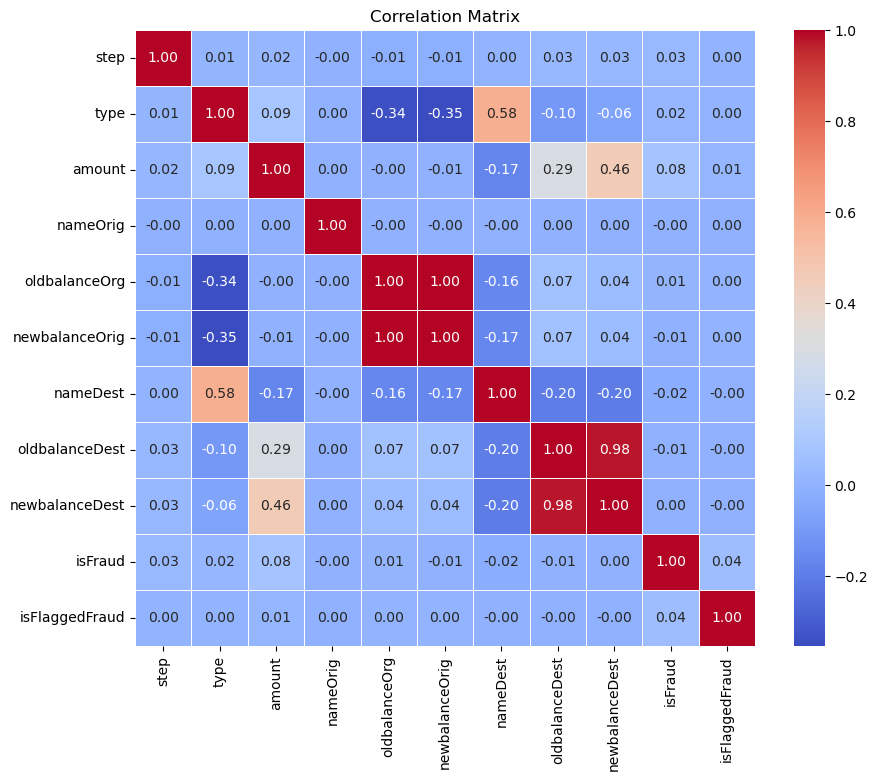

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1) Their is multi_collinearity between 4 independent features

( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766
( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988
Need to remove one from each of two correlation

2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest',
becuase they are less correlated with dependent feature ( "isFraud"),
as compare to other two one.

In [79]:
df['nameDest'].value_counts()

nameDest
84652      113
567820     109
472721     105
320660     102
349730     101
          ... 
1095075      1
939730       1
1445164      1
1774945      1
319713       1
Name: count, Length: 2722362, dtype: int64

In [80]:
df=df.drop('newbalanceOrig', axis=1)
df=df.drop('newbalanceDest', axis=1)
df=df.drop('isFlaggedFraud', axis=1)

In [81]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

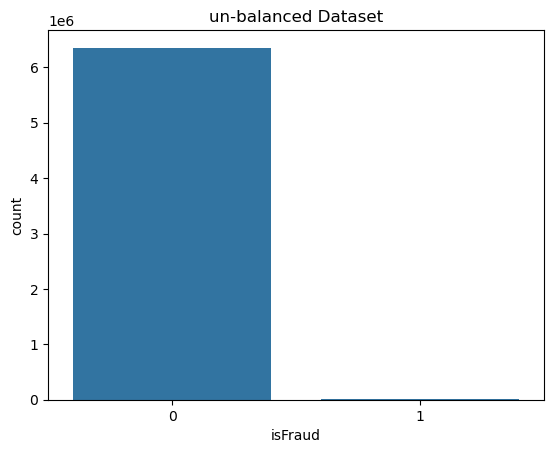

In [82]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

In [83]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [84]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 8)
(8213, 8)


In [85]:
normal_transaction=normal_transaction.sample(n=8213)
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 8)
(8213, 8)


In [86]:
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud
6099428,522,4,913471.50,1540744,0.0,65268,1.203982e+08,0
3981094,298,3,18359.55,59677,0.0,834060,0.000000e+00,0
6117936,531,1,346972.41,3106830,0.0,536791,1.032993e+06,0
1171975,132,4,446076.62,408607,0.0,15282,2.560732e+06,0
1670345,158,3,7980.87,4083728,0.0,2464024,0.000000e+00,0


In [87]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [88]:

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



c:\Users\Sai Chowdary\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7980925324675324
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2479
           1       0.77      0.85      0.81      2449

    accuracy                           0.80      4928
   macro avg       0.80      0.80      0.80      4928
weighted avg       0.80      0.80      0.80      4928



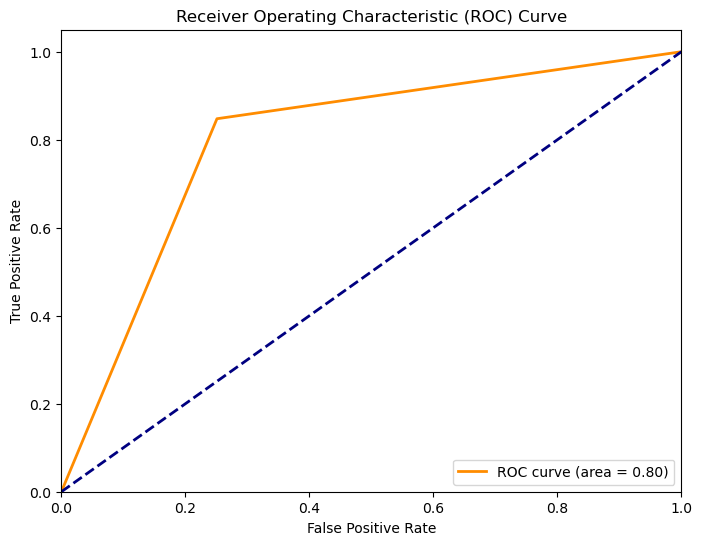

In [98]:
# Initialize and train the Logistic Regression model
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,precision_recall_curve
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy_log_reg)
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy_knn:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_predict))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2479
           1       0.88      0.90      0.89      2449

    accuracy                           0.89      4928
   macro avg       0.89      0.89      0.89      4928
weighted avg       0.89      0.89      0.89      4928



In [91]:
from sklearn.model_selection import KFold, cross_val_score

model = KNeighborsClassifier()  


kfold = KFold(n_splits=5, shuffle=True, random_state=42)  

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')  

# Print the results
print(f'Cross-Validation Accuracy Scores: {cv_results}')
print(f'Mean Accuracy: {cv_results.mean()}')
print(f'Standard Deviation of Accuracy: {cv_results.std()}')

Cross-Validation Accuracy Scores: [0.88709677 0.89436834 0.89680365 0.89406393 0.89010654]
Mean Accuracy: 0.8924878479893946
Standard Deviation of Accuracy: 0.0034461785297950826


In [96]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=500, random_state=4)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9784902597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2479
           1       0.97      0.99      0.98      2449

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



In [97]:
best_accuracy = max(accuracy_log_reg, accuracy_knn,accuracy)
best_classifier = ""
if best_accuracy == accuracy_log_reg:
    best_classifier = "Logistic Regression"
elif best_accuracy == accuracy_knn:
    best_classifier = "K-Nearest Neighbors"
else:
    best_classifier = "Random Forest"

print(f"The best classifier is {best_classifier} with accuracy: {best_accuracy}")
Accuracy = best_accuracy * 100
print(f"The accuracy of the best classifier is {Accuracy:.2f}%")

The best classifier is Random Forest with accuracy: 0.9784902597402597
The accuracy of the best classifier is 97.85%
